In [1]:
import pandas as pd
import numpy as np
import re
import os
import multiprocessing as mp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [ ]:
num_to_categ
# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV  :  8 

# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV  :  9 

In [2]:
data = pd.read_table('../relevant/data685.txt',index_col=False)

In [3]:
todrop = []
for col in [c for c in data.columns if data[c].dtype.name != 'object']:
    if len(data[col].unique())<2:
        todrop.append(col)
        print col, ' : ', len(data[col].unique()), '\n'

GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioManRef_ActV  :  1 

SCC._SccRtData.SccRtData.SccRefPrsPmp  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[22]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[23]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[24]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[22]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[22]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[23]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[23]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[24]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[24]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[21]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[22]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[23]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[24]  :  1 

THC.GlobVar.AccCtrlInput_Out.SpecFlwRef[21]  :  1 

THC.GlobVar.AccCtrlInput_Out.SpecFlwRef[22]  :  1 

In [4]:
data.drop(todrop, axis=1, inplace=1)

In [47]:
def VarianceThreshold_selector(X):
    columns = X.columns
    selector = VarianceThreshold(threshold=(.99*(1-.99)))
    selector.fit_transform(X)
    labels = [columns[x] for x in selector.get_support(indices=True) if x]
    return pd.DataFrame(X[labels], columns=labels)

numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

In [7]:
data1_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>139)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[1]']<206)]
data2_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>139)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<206)]

In [8]:
data1 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]
data2 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]

In [48]:
data1_var = VarianceThreshold_selector(data1[numerical_columns])
data2_var = VarianceThreshold_selector(data2[numerical_columns])

In [107]:
[col for col in data1_var.columns if col not in data2_var.columns]

['GFC.GlobVar.AccTrkMap.PltSpdCol[2]']

In [108]:
[col for col in data2_var.columns if col not in data1_var.columns]

['GFC.GlobVar.GfcLocRtData.GfcSccWatPrsScc',
 'BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[21]']

In [111]:
data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[2]']<0]['GSF.GlobVar.AccTrkMap.PosHeadCol[1]'].max()

240.113

In [55]:
np.var(data1['GFC.GlobVar.AccTrkMap.PltSpdCol[1]'])

0.13960211328233052

In [27]:
data2.shape

(135448, 543)

In [50]:
data2_var.shape

(135448, 489)

In [95]:
 data2['GFC.GlobVar.AccTrkMap.PltSpdCol[2]'].min()

0.55719700000000005

In [ ]:
data1.id1.unique().tolist()

In [236]:
print len(data1)
print len(data2)
print len(data)
print len(data1)+len(data2)

249531
135448
545708
384979


In [237]:
data1_temp['pltid'] = data1['id1']
data2_temp['pltid'] = data2['id2']

data1['pltid'] = data1['id1']
data2['pltid'] = data2['id2']

/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
num_to_categ
# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV  :  8 

# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV  :  9 

In [96]:
data1_var['GFC.GlobVar.AccTrkMap.PltSpdCol[1]'].min()


-0.95569400000000004

In [92]:
c = data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[1]']>2.5].id1.unique().tolist()

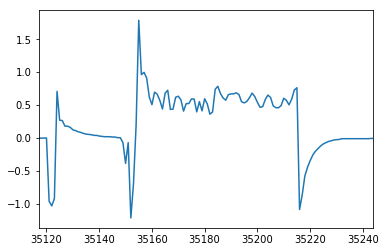

In [232]:
(data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.Prc1PosRef'] - data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.PrcPosActDs1']).plot()
plt.show()

In [59]:
l = pd.read_csv('../relevant/dataset120517.csv', sep=';') #

In [75]:
l.loc[(l.NOT_IN_40_0C==0)]['IS_FIRST'].sum()

85

In [60]:
l.loc[l.PIECE_ID==2016101701240000]['TMP_STP_ALL_AVG']

4032    549.561035
Name: TMP_STP_ALL_AVG, dtype: float64

In [100]:


l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['NOT_IN_40_0C'].sum()/float(len(data1.id1.unique()))

0.0106951871657754

In [105]:
float(len(data1.id1.unique()))

1870.0

In [104]:
l.loc[l.PIECE_ID.isin(data2.id2.unique().tolist())]['NOT_IN_40_0C'].sum()/float(len(data2.id2.unique()))

0.0035026269702276708

In [ ]:
l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['NOT_IN_40_0C'].sum()

In [32]:
l.NOT_IN_40_0C.value_counts()

0    9310
1      66
Name: NOT_IN_40_0C, dtype: int64

In [6]:
#sort by time
# dist btw lists
#время охлаждения
df = pd.concat([data1, data2],ignore_index=1)